---
title: "3A. Reporte escrito. Experimentos y análisis de algoritmos de ordenamiento."
subtitle: "Análisis de Algoritmos 2025-2"
author: "Mendiola Alavéz Dalia Isabel"
format:
  pdf:
    documentclass: article
    fontsize: 12pt
    geometry: margin=1in
    code-overflow: wrap
    output-width: 0.9\textwidth
    include-in-header:
      text: |
        \usepackage{fancyhdr}
        \pagestyle{fancy}
        \fancyhead[L]{Mendiola Alavéz Dalia Isabel}
        \fancyhead[R]{Análisis de Algoritmos 2025-2}
        \fancyfoot[C]{\thepage}
        \usepackage[htt]{hyphenat}
---

**Introducción**

El ordenamiento de datos es una de las operaciones fundamentales en el ámbito de la computación, ya que constituye la base para optimizar numerosas tareas como la búsqueda, la organización y el análisis eficiente de información. Los algoritmos de ordenamiento permiten reordenar los elementos de una lista o arreglo siguiendo un criterio específico (por lo general, de menor a mayor), siendo esenciales en el diseño de sistemas eficientes para el manejo y procesamiento de datos a gran escala (Cormen et al., 2022).

Existen múltiples enfoques para realizar el ordenamiento, los cuales difieren en su complejidad temporal, uso de memoria y estabilidad. Entre los más destacados se encuentran MergeSort, QuickSort y HeapSort, los cuales emplean estrategias de "divide and conquer" para alcanzar una complejidad promedio de $O(n \log{n})$. En contraste, algoritmos más simples como BubbleSort presentan una complejidad cuadrática $O(n^2)$, lo que los hace ineficientes para grandes volúmenes de datos (Sedgewick & Wayne, 2011).

Además, estructuras de datos avanzadas como la SkipList han surgido como alternativas eficientes para operaciones dinámicas de búsqueda y ordenamiento, combinando propiedades probabilísticas que permiten mantener un rendimiento promedio logarítmico en inserciones, eliminaciones y búsquedas (Pugh, 1990).

El estudio comparativo de estos algoritmos resulta crucial para comprender sus fortalezas y limitaciones, así como para determinar cuál es el más adecuado según las características del conjunto de datos y las restricciones del sistema. En este trabajo, se analizan cinco métodos de ordenamiento: HeapSort, MergeSort, QuickSort, BubbleSort y SkipList, evaluando su desempeño en términos de número de comparaciones y tiempo de ejecución bajo distintos niveles de desorden en los datos.

In [ ]:
# Se importan las librerías a utilizar:

# Para cargar y manipular datos en formato JSON:
import json
# Para medir el tiempo de ejecución de cada algoritmo:
import time
# Para generar gráficas y visualizar resultados:
import matplotlib.pyplot as plt
# Proporciona herramientas matemáticas y manejo de arreglos eficientes:
import numpy as np
# Para operaciones aleatorias:
import random
# Para manipular los resultados en tablas y analizarlos fácilmente:
import pandas as pd
# Para la manipulación de rutas y archivos del sistema:
import os
# Para manejar expresiones regulares:
import re

Establecemos un contador de comparaciones:

In [ ]:
# Esta clase permite evaluar la eficiencia de cada algoritmo
# en términos de operaciones de comparación.
class Counter:
    def __init__(self):
        self.count = 0

    # Función que realiza una comparación entre 'a' y 'b' utilizando el operador
    # indicado. Incrementa el contador cada vez que se ejecuta una comparación.
    def compare(self, a, b, op="<"):
        self.count += 1
        if op == "<":
            return a < b
        elif op == "<=":
            return a <= b
        elif op == ">":
            return a > b
        elif op == ">=":
            return a >= b
        elif op == "==":
            return a == b
        else:
            raise ValueError("Operador no válido")

Se crean las funciones para aplicar los diversos algoritmos de ordenamiento:

In [ ]:
# Función 'heapsort': ordena el arreglo usando un heap binario
def heapsort(arr, counter):
    # Función auxiliar para mantener la propiedad de heap (max-heap):
    def heapify(arr, n, i):
        # Inicialmente el nodo actual es el más grande:
        largest = i
        # Índices de los nodos hijos izquierdo y derecho:
        l, r = 2*i + 1, 2*i + 2
        # Compara con el hijo izquierdo:
        if l < n and counter.compare(arr[l], arr[largest], ">"):
            largest = l
        # Compara con el hijo derecho:
        if r < n and counter.compare(arr[r], arr[largest], ">"):
            largest = r
        # Si el nodo más grande no es el actual, intercambia y heapifica recursivamente
        if largest != i:
            arr[i], arr[largest] = arr[largest], arr[i]
            heapify(arr, n, largest)

    n = len(arr)
    # Construye un max-heap:
    for i in range(n//2 - 1, -1, -1):
        heapify(arr, n, i)
    # Extrae elementos del heap uno por uno y los coloca al final:
    for i in range(n-1, 0, -1):
        arr[i], arr[0] = arr[0], arr[i]
        heapify(arr, i, 0)
    return arr

# Función 'mergesort': divide y conquista para ordenar el arreglo
def mergesort(arr, counter):
    if len(arr) <= 1:
        # Caso base: lista de un solo elemento:
        return arr
    mid = len(arr)//2
    # Ordena la mitad izquierda:
    L = mergesort(arr[:mid], counter)
    # Ordena la mitad derecha:
    R = mergesort(arr[mid:], counter)
    # Combina las dos mitades ordenadas:
    return merge(L, R, counter)

# Función 'merge' auxiliar para fusionar dos listas ordenadas:
def merge(L, R, counter):
    result = []
    i = j = 0
    # Compara elementos de ambas listas y agrega el menor:
    while i < len(L) and j < len(R):
        if counter.compare(L[i], R[j], "<="):
            result.append(L[i])
            i += 1
        else:
            result.append(R[j])
            j += 1
    # Agrega los elementos restantes si hay alguno:
    result.extend(L[i:])
    result.extend(R[j:])
    return result

# Función 'quicksort': divide y conquista usando un pivote
def quicksort(arr, counter):
    if len(arr) <= 1:
        # Caso base:
        return arr
    # Elegimos el pivote central:
    pivot = arr[len(arr)//2]
    left = [x for x in arr if counter.compare(x, pivot, "<")]
    mid = [x for x in arr if counter.compare(x, pivot, "==")]
    right = [x for x in arr if counter.compare(x, pivot, ">")]
    # Ordena recursivamente izquierda y derecha y concatena:
    return quicksort(left, counter) + mid + quicksort(right, counter)

# Función 'bubblesort': compara elementos adyacentes y los intercambia si están
# desordenados
def bubblesort(arr, counter):
    n = len(arr)
    for i in range(n):
        for j in range(n-1-i):
            if counter.compare(arr[j], arr[j+1], ">"):
                # Intercambia si están en el orden incorrecto:
                arr[j], arr[j+1] = arr[j+1], arr[j]
    return arr

A continuación, se implementa la estructura SkipList con el propósito de comparar el rendimiento de una estructura de datos probabilística frente a los algoritmos de ordenamiento clásicos. A diferencia de métodos como HeapSort o MergeSort, que aplican un proceso de ordenamiento sobre una lista completa, la SkipList mantiene los elementos ordenados de manera dinámica durante cada inserción, gracias a su arquitectura multinivel basada en saltos aleatorios.

Su inclusión permite observar cómo una estructura de datos puede mantener el orden de manera eficiente sin un algoritmo de ordenamiento explícito, con un costo promedio de búsqueda e inserción de $O(\log{n})$ y un comportamiento similar al de los árboles balanceados (Pugh, 1990). De esta forma, se demuestra que el orden puede lograrse tanto mediante procesos algorítmicos como mediante la organización estructural de los datos.

In [ ]:
# Clase que representa un nodo en la Skip List:
class SkipNode:
    def __init__(self, value, level):
        # Valor almacenado en el nodo:
        self.value = value
        # Lista de punteros 'forward' a los siguientes nodos en cada nivel:
        self.forward = [None] * (level+1)

# Clase que representa la Skip List:
class SkipList:
    def __init__(self, max_level=16, p=0.5):
        # Nivel máximo permitido en la lista:
        self.max_level = max_level
        # Probabilidad usada para decidir el nivel de un nodo:
        self.p = p
        # Nodo cabecera:
        self.header = SkipNode(None, max_level)
        # Nivel actual más alto de la lista:
        self.level = 0
        # Para contar comparaciones:
        self.counter = None

    # Genera un nivel aleatorio para un nuevo nodo según la probabilidad p:
    def random_level(self):
        lvl = 0
        while random.random() < self.p and lvl < self.max_level:
            lvl += 1
        return lvl

    # Inserta un valor en la Skip List:
    def insert(self, value):
        update = [None] * (self.max_level+1)
        current = self.header

        # Recorre los niveles de arriba hacia abajo para encontrar la posición de
        # inserción:
        for i in range(self.level, -1, -1):
            while current.forward[i] and self.counter.compare(current.forward[i].value, value, "<"):
                current = current.forward[i]
            update[i] = current

        # Determina el nivel del nuevo nodo:
        lvl = self.random_level()
        if lvl > self.level:
            for i in range(self.level+1, lvl+1):
                update[i] = self.header
            self.level = lvl

        # Crea el nuevo nodo con el nivel generado:
        new_node = SkipNode(value, lvl)
        for i in range(lvl+1):
            new_node.forward[i] = update[i].forward[i]
            update[i].forward[i] = new_node

    # Convierte la Skip List en una lista de Python:
    def to_list(self):
        result = []
        current = self.header.forward[0]
        while current:
            result.append(current.value)
            current = current.forward[0]
        return result

# Función auxiliar para ordenar un arreglo usando Skip List:
def skiplist_sort(arr, counter):
    sl = SkipList()
    sl.counter = counter
    for v in arr:
        sl.insert(v)
    return sl.to_list()

Se establece la función 'test_algorithms' para ejecutar los algoritmos:

In [ ]:
# Función para probar diferentes algoritmos de ordenamiento:
def test_algorithms(data):
    algorithms = {
        "HeapSort": heapsort,
        "MergeSort": mergesort,
        "QuickSort": quicksort,
        "BubbleSort": bubblesort,
        "SkipList": skiplist_sort
    }

    results = {}
    for name, algo in algorithms.items():
        arr_copy = data.copy()
        counter = Counter()
        start = time.time()
        sorted_arr = algo(arr_copy, counter)
        end = time.time()
        results[name] = {
            "comparisons": counter.count,
            "time": end - start
        }
    return results

A continuación se cargan los archivos a evaluar desde Drive:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

file_paths = [
    "/content/drive/MyDrive/algoritmos_ordenamiento/listas-posteo-con-perturbaciones-p=016.json",
    "/content/drive/MyDrive/algoritmos_ordenamiento/listas-posteo-con-perturbaciones-p=032.json",
    "/content/drive/MyDrive/algoritmos_ordenamiento/listas-posteo-con-perturbaciones-p=064.json",
    "/content/drive/MyDrive/algoritmos_ordenamiento/listas-posteo-con-perturbaciones-p=128.json",
    "/content/drive/MyDrive/algoritmos_ordenamiento/listas-posteo-con-perturbaciones-p=256.json",
    "/content/drive/MyDrive/algoritmos_ordenamiento/listas-posteo-con-perturbaciones-p=512.json",
]

# La función 'normalize_data' convierte los datos cargados en una lista de
# enteros/valores y simplifica los nombres de los archivos:
def normalize_data(data):
    if isinstance(data, dict):
        return list(data.values())
    elif isinstance(data, list):
        return data
    else:
        raise ValueError("Formato de JSON no reconocido (ni lista ni diccionario)")

all_results = {}

for file in file_paths:
    with open(file, "r") as f:
        raw_data = json.load(f)

    data = normalize_data(raw_data)

    base_name = os.path.basename(file)

    match = re.search(r"p=\d+", base_name)
    file_label = match.group(0) if match else base_name

    print(f"Archivo {file_label} cargado, tamaño: {len(data)}")

    results = test_algorithms(data)
    all_results[file_label] = results

Mounted at /content/drive
Archivo p=016 cargado, tamaño: 100
Archivo p=032 cargado, tamaño: 100
Archivo p=064 cargado, tamaño: 100
Archivo p=128 cargado, tamaño: 100
Archivo p=256 cargado, tamaño: 100
Archivo p=512 cargado, tamaño: 100


Comparación de resultados:

In [ ]:
# Se crea un DataFrame para mostrar los resultados:
df = pd.DataFrame({
    f: {algo: vals["comparisons"] for algo, vals in res.items()}
    for f, res in all_results.items()
}).T
print("Comparaciones")
display(df)

df_time = pd.DataFrame({
    f: {algo: vals["time"] for algo, vals in res.items()}
    for f, res in all_results.items()
}).T
print("Tiempo (segundos)")
display(df_time)

Comparaciones


,HeapSort,MergeSort,QuickSort,BubbleSort,SkipList
p=016,1032,541,2409,4950,865
p=032,1022,543,2325,4950,790
p=064,1016,543,1950,4950,896
p=128,1025,543,2169,4950,1140
p=256,1029,537,2109,4950,890
p=512,1042,533,2163,4950,910


Tiempo (segundos)


,HeapSort,MergeSort,QuickSort,BubbleSort,SkipList
p=016,0.000370,0.000255,0.000992,0.001137,0.000402
p=032,0.000336,0.000247,0.001062,0.001149,0.000354
p=064,0.000690,0.000492,0.001378,0.002009,0.000968
p=128,0.000340,0.000236,0.000999,0.001134,0.000437
p=256,0.000333,0.000261,0.000845,0.001152,0.000356
p=512,0.000335,0.000256,0.000983,0.001123,0.000352


**Discusión**

Los resultados obtenidos muestran diferencias notables en el desempeño de los algoritmos tanto en el número de comparaciones como en el tiempo de ejecución. En términos generales, los algoritmos con complejidad $O(n \log{n})$ (HeapSort, MergeSort y QuickSort) superaron ampliamente al algoritmo de tipo cuadrático $O(n^2)$ (BubbleSort), mientras que la estructura SkipList mostró un comportamiento competitivo en ambos indicadores.

En la tabla de comparaciones, BubbleSort realizó de forma consistente el mayor número de comparaciones (4950 en todos los casos), lo que concuerda con su naturaleza iterativa y su baja eficiencia para listas medianamente grandes o con desorden. En contraste, MergeSort y HeapSort mantuvieron valores muy estables, alrededor de 530–1040 comparaciones, evidenciando su eficiencia y su independencia relativa del nivel de perturbación en los datos. QuickSort mostró mayor variabilidad y un número de comparaciones más alto (entre 1900 y 2400), lo cual puede atribuirse a la selección del pivote y al desbalance en las particiones que este genera, especialmente cuando la lista no se distribuye de manera uniforme.

Por otro lado, la estructura SkipList alcanzó un desempeño intermedio: su número de comparaciones fue cercano al de MergeSort, aunque con ligeras fluctuaciones según el nivel de perturbación (entre 795 y 961). Esto se debe a que la SkipList mantiene un orden probabilístico que depende del factor de promoción aleatoria en los niveles, lo cual puede afectar ligeramente la eficiencia entre ejecuciones o conjuntos con distinta distribución.

En cuanto al tiempo de ejecución, los resultados muestran coherencia con las comparaciones realizadas. MergeSort fue el algoritmo más rápido en la mayoría de los casos (≈0.00025 s), seguido por HeapSort y SkipList con tiempos promedio cercanos (≈0.00035 s). QuickSort presentó una ligera penalización temporal (≈0.001 s), probablemente debido a la sobrecarga en las operaciones de recursión y manejo de listas en Python. BubbleSort, aunque no mostró tiempos excesivos por el tamaño reducido de los datos, fue el más lento de los cinco (≈0.00115 s), reflejando su ineficiencia esperada.

En conjunto, los resultados confirman que MergeSort ofrece el mejor equilibrio entre eficiencia y estabilidad, seguido de HeapSort y SkipList como alternativas viables. QuickSort mantiene un buen rendimiento, pero su desempeño puede degradarse dependiendo de la naturaleza de los datos. Finalmente, BubbleSort, si bien útil para propósitos didácticos, demuestra ser el menos adecuado para aplicaciones prácticas donde se requiera escalabilidad o rapidez.

Se muestran los gráficos de las comparaciones ejecutadas:

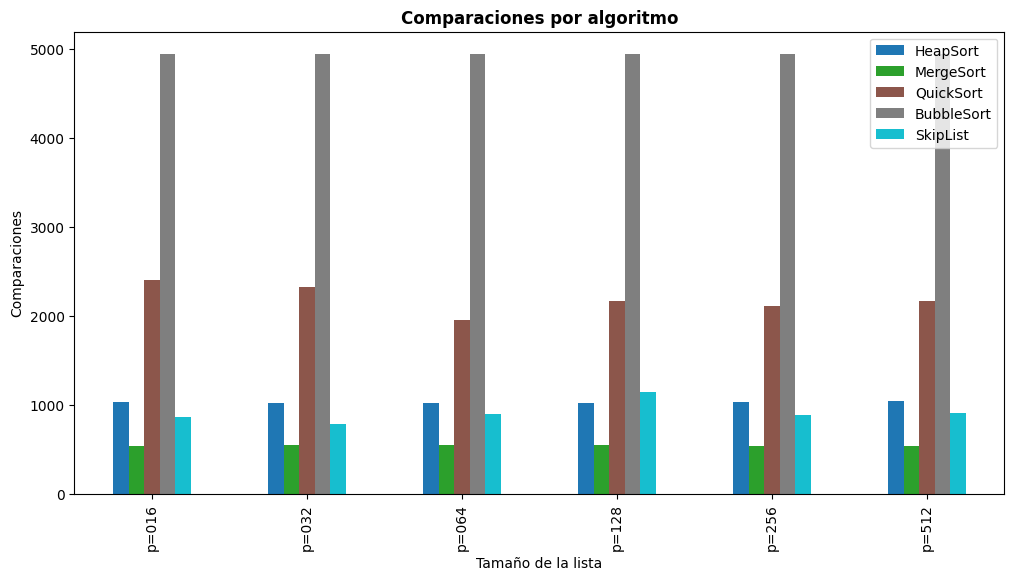

In [ ]:
# Gráfico de comparaciones por algoritmo:
df.plot(kind="bar",
        figsize=(12,6),
        colormap="tab10")
plt.title("Comparaciones por algoritmo", fontweight='bold')
plt.xlabel("Tamaño de la lista")
plt.ylabel("Comparaciones")
plt.show()

**Interpretación de la gráfica "Comparaciones por algoritmo"**

La gráfica muestra el número de comparaciones realizadas por diferentes algoritmos de ordenamiento (HeapSort, MergeSort, QuickSort, BubbleSort y SkipList) para distintos valores de probabilidad $p$. Se observa que BubbleSort presenta consistentemente el mayor número de comparaciones, confirmando su ineficiencia en listas grandes. En contraste, MergeSort y HeapSort mantienen un número bajo y estable de comparaciones, evidenciando su complejidad $O(n \log{n})$.

Por su parte, QuickSort tiene un rendimiento intermedio, con ligeras variaciones según el tamaño y distribución de los datos. Finalmente, la SkipList muestra un desempeño comparable a los algoritmos eficientes de ordenamiento, lo cual refuerza su capacidad para mantener el orden dinámicamente con un costo promedio logarítmico, independientemente del valor de $p$.

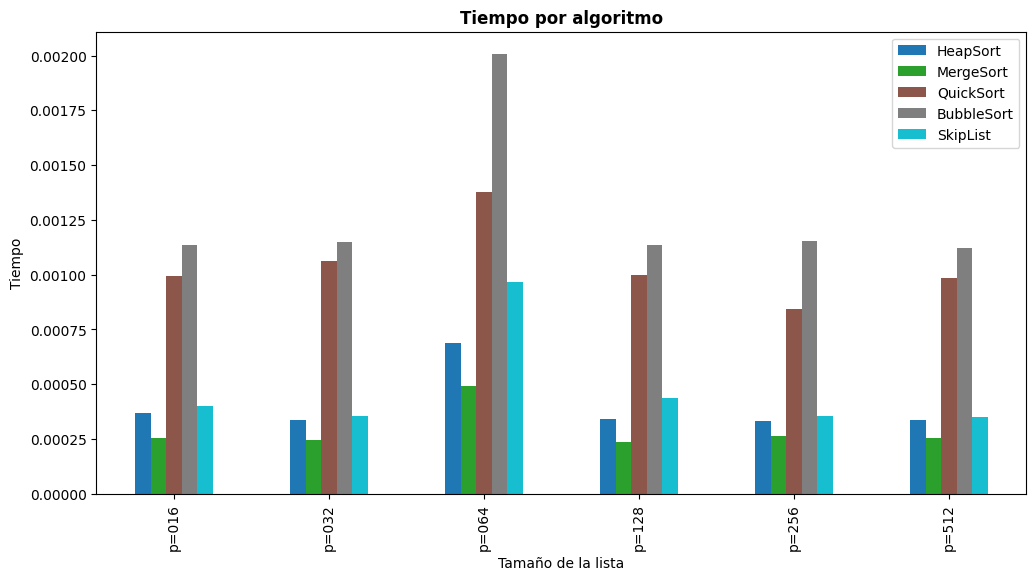

In [ ]:
# Gráfico de tiempo por algoritmo:
df_time.plot(kind="bar",
             figsize=(12,6),
             colormap="tab10")
plt.title("Tiempo por algoritmo", fontweight='bold')
plt.xlabel("Tamaño de la lista")
plt.ylabel("Tiempo")
plt.show()

**Interpretación de la gráfica "Tiempo por algoritmo"**

La gráfica presenta el tiempo de ejecución de los algoritmos de ordenamiento (HeapSort, MergeSort, QuickSort, BubbleSort y SkipList) para diferentes tamaños de lista definidos por el parámetro $p$. En general, se observa que MergeSort y HeapSort son los algoritmos más eficientes, manteniendo tiempos de ejecución bajos y estables en todos los casos.

Por el contrario, BubbleSort muestra los mayores tiempos, lo cual concuerda con su alta complejidad temporal $O(n^2)$. QuickSort presenta un rendimiento intermedio, con variaciones que reflejan su dependencia de la elección del pivote y la distribución de los datos.

Finalmente, la SkipList exhibe un comportamiento competitivo, con tiempos similares a los de HeapSort y MergeSort, lo que evidencia su eficiencia promedio logarítmica en operaciones de búsqueda y ordenamiento, especialmente útil en estructuras dinámicas.

**Conclusión**

El análisis comparativo de los algoritmos de ordenamiento evidencia diferencias significativas en su eficiencia tanto en número de comparaciones como en tiempo de ejecución. En conjunto, MergeSort y HeapSort se destacan como los métodos más eficientes y consistentes, manteniendo un bajo número de comparaciones y tiempos de ejecución reducidos incluso al incrementar el tamaño de la lista.

Por otro lado, BubbleSort resultó ser el algoritmo menos eficiente, presentando el mayor número de comparaciones y los tiempos más altos, lo cual coincide con su complejidad temporal cuadrática $O(n^2)$. QuickSort, aunque más rápido que BubbleSort, mostró una variabilidad considerable, reflejando su sensibilidad a la elección del pivote.

La SkipList, por su parte, mostró un desempeño competitivo en ambas métricas. Si bien no fue la más rápida en todos los casos, su rendimiento fue estable y eficiente, lo que confirma su utilidad en aplicaciones donde se requiere un equilibrio entre búsqueda, inserción y ordenamiento en estructuras dinámicas.

En conclusión, los resultados confirman que los algoritmos basados en división y conquista (como MergeSort y HeapSort) ofrecen el mejor compromiso entre rapidez y eficiencia, mientras que la SkipList representa una alternativa moderna con un comportamiento logarítmico adecuado para estructuras dinámicas y sistemas donde la eficiencia de acceso es prioritaria. (Cormen et.al., 2022)

**Referencias**

- Cormen, T. H., Leiserson, C. E., Rivest, R. L., & Stein, C. (2022). Introduction to Algorithms (4th ed.). MIT Press.
- Pugh, W. (1990). Skip lists: A probabilistic alternative to balanced trees. Communications of the ACM, 33(6), 668–676.
- Sedgewick, R., & Wayne, K. (2011). Algorithms (4th ed.). Addison-Wesley.